In [1]:
%load_ext jupyter_black

In [2]:
from datetime import datetime
from griblib.hrrr import load_hrrr

In [3]:
hrrr = load_hrrr(datetime(2022, 6, 14), 24)
hrrr

HRRR(start_date=datetime.datetime(2022, 6, 14, 0, 0), hours=24, date_range=DatetimeIndex(['2022-06-14', '2022-06-15'], dtype='datetime64[ns]', freq='D'), fs=<s3fs.core.S3FileSystem object at 0x7ff025a76fb0>)

In [5]:
refd = hrrr.surface.forecast.reflectivity()["REFD"]
refd

,Array,Chunk
Bytes,523.26 MiB,3.09 MiB
Shape,"(2, 72, 1059, 1799)","(1, 72, 150, 150)"
Count,1406 Tasks,192 Chunks
Type,float16,numpy.ndarray


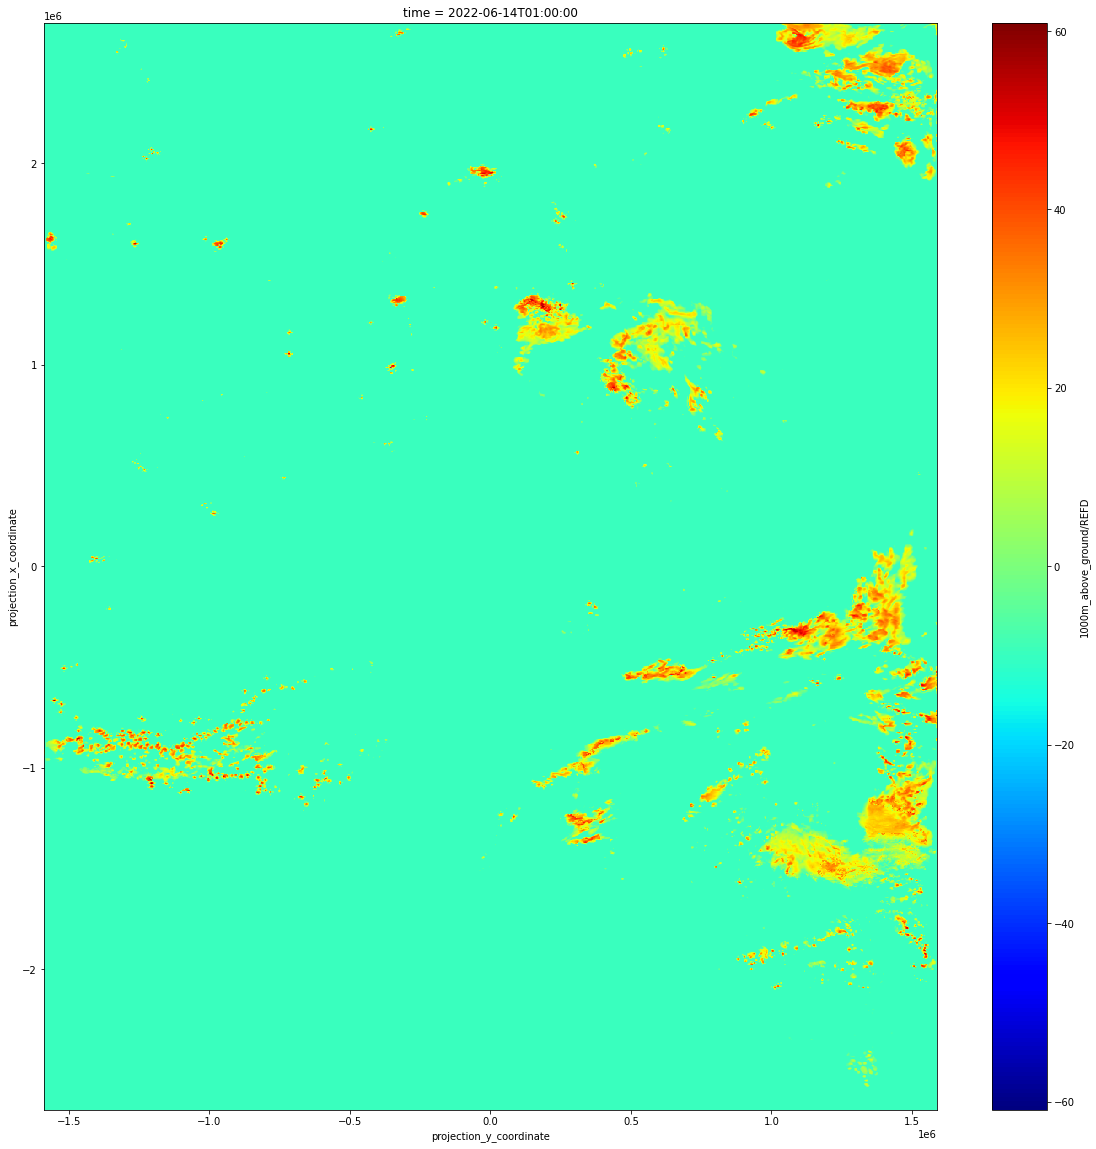

: 

In [18]:
import matplotlib.pyplot as plt

refd[0][0].T.plot(figsize=(20, 20), cmap=plt.get_cmap("jet"))

In [ ]:
# parameter_long_name: defines the method name
# vertical_level: is an argument passed into the method
# parameter_short_name: is used internally to retrive and index the data
hrrr.surface.table.loc["reflectivity", "vertical_level"].tolist()
# (hrrr.surface.table == "Reflectivity").any()

In [15]:
# each long_name method has a default vertical_level set
hail = hrrr.surface.forecast.hail()
hail

<xarray.Dataset>
Dimensions:                  (time: 72, projection_x_coordinate: 1799,
                              projection_y_coordinate: 1059, valid_time: 2)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-14T01:00:00 ... 20...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
Dimensions without coordinates: valid_time
Data variables:
    HAIL_1hr_max_fcst        (valid_time, time, projection_y_coordinate, projection_x_coordinate) float16 dask.array<chunksize=(1, 72, 150, 150), meta=np.ndarray>
    forecast_period          (valid_time, time) timedelta64[ns] dask.array<chunksize=(1, 72), meta=np.ndarray>
    forecast_reference_time  (valid_time) datetime64[ns] 2022-06-14 2022-06-15

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a = hail["HAIL_1hr_max_fcst"][0][0]
alpha = np.where(a > 0, 1, 0)
a

<xarray.DataArray 'HAIL_1hr_max_fcst' (projection_y_coordinate: 1059,
                                       projection_x_coordinate: 1799)>
dask.array<getitem, shape=(1059, 1799), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Coordinates:
    time                     datetime64[ns] 2022-06-14T01:00:00
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
Attributes:
    GRIB_PARAM:    [2, 0, 1, 31]
    cell_methods:  time: maximum
    coordinates:   forecast_reference_time forecast_period
    long_name:     surface/HAIL_1hr_max_fcst

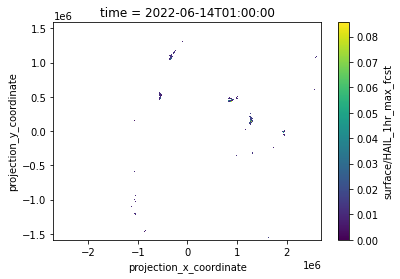

In [17]:
a.plot(alpha=alpha, x="projection_x_coordinate", y="projection_y_coordinate")